In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

# Time plot

In [3]:
var4d_time_df = pd.read_csv('./out/var4d_df_time_v30_3outer_test.csv')
bp_time_df = pd.read_csv('./out/bp_df_time_v30_raytune_best_epochs3_test.csv')
var4d_time_df_mean = var4d_time_df.groupby('system_dim').mean()
bp_time_df_mean= bp_time_df.groupby('system_dim').mean()

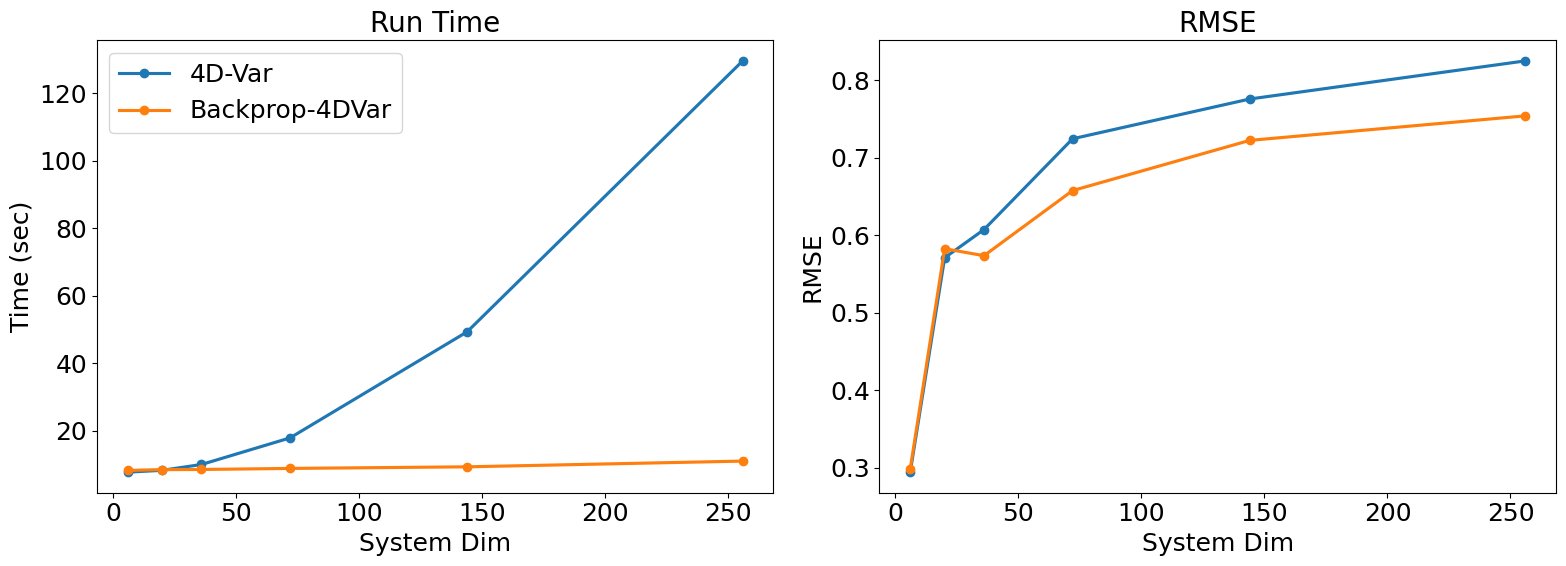

In [4]:
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1, 2, figsize = (16, 6))
var4d_time_df_mean['time'].plot(ax=axs[0], style='.-', markersize=12, lw=2.25)
bp_time_df_mean['time'].plot(ax=axs[0], style='.-', markersize=12, lw=2.25)
axs[0].set_ylabel('Time (sec)')
axs[0].legend(labels=['4D-Var', 'Backprop-4DVar'])
var4d_time_df_mean['rmse'].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
bp_time_df_mean['rmse'].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
axs[1].set_ylabel('RMSE')
axs[0].set_xlabel('System Dim')
axs[1].set_xlabel('System Dim')
axs[0].set_title('Run Time', size=20)
axs[1].set_title('RMSE', size=20)
fig.tight_layout()
# fig.suptitle('4DVar vs. Backprop 4DVar: Lorenz96 with increasing system size \n(Mean of 5 runs)', y=1.08, size=22)

In [5]:
x = var4d_time_df_mean.index
y = var4d_time_df_mean['time']

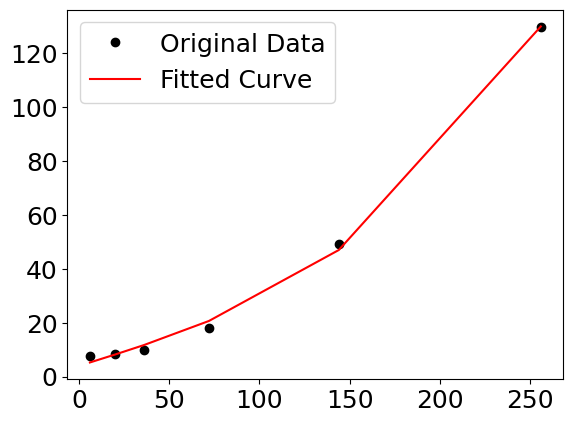

In [6]:
def func(x, a, b,c ):
    return a + b*x + c*x**3

popt, pcov = scipy.optimize.curve_fit(func, x, y)


plt.figure()
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [7]:
x = var4d_time_df_mean.index
y = bp_time_df_mean['time']

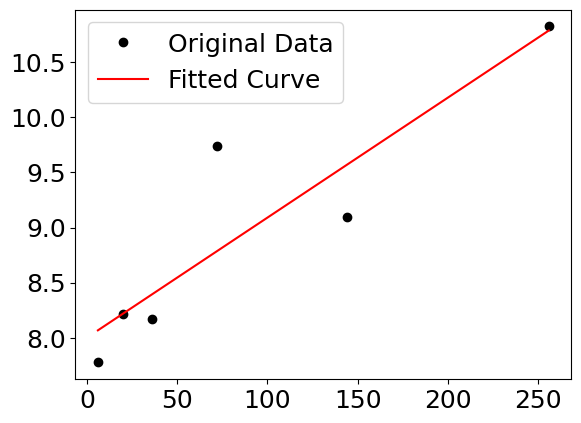

In [8]:
def func(x, a, b):
    return a + b*x

popt, pcov = scipy.optimize.curve_fit(func, x, y)


plt.figure()
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

# Heatmap

In [9]:
var4d_experiment_df = pd.read_csv('./out/var4d_df_obs_v29_3outer_test.csv')
bp_experiment_df = pd.read_csv('./out/bp_df_obs_v29_raytune_best_epochs3_test.csv')

In [10]:
num_obs_list = [6, 12, 18, 24, 30, 36]
obs_error_list = np.arange(0.1, 1.05, 0.1)

In [11]:
bp_array = np.flipud((bp_experiment_df['rmse'].values.reshape((len(num_obs_list), len(obs_error_list)))).T)
var4d_array = np.flipud((var4d_experiment_df['rmse'].values.reshape((len(num_obs_list), len(obs_error_list)))).T)

Text(0.5, 1.0, 'Backprop-4DVar')

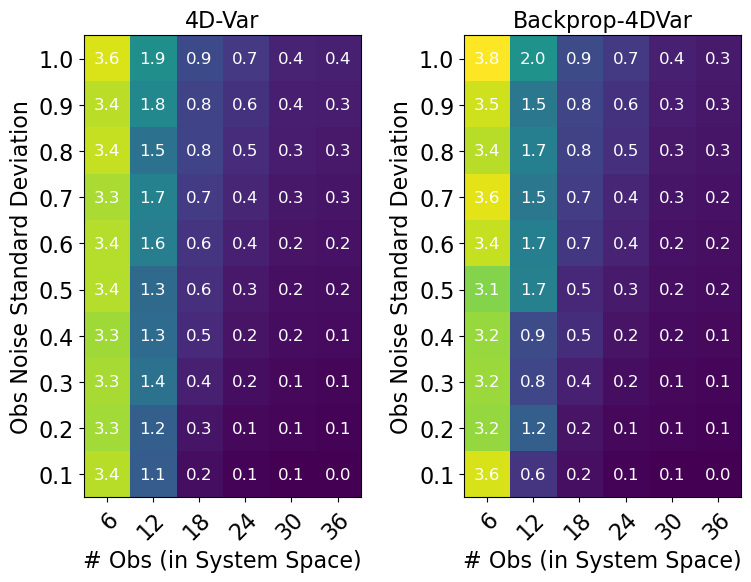

In [12]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 2, figsize = (9, 6))

num_obs_list = [6, 12, 18, 24, 30, 36]
obs_error_list = np.arange(1.0, 0.05, -0.1)

# Var4d
im = axs[0].imshow(var4d_array,
                   vmin = np.min(np.concatenate([bp_array, var4d_array])),
                   vmax = np.max(np.concatenate([bp_array, var4d_array])))

# Show all ticks and label them with the respective list entries
axs[0].set_xticks(np.arange(len(num_obs_list)), labels=num_obs_list)
axs[0].set_yticks(np.arange(len(obs_error_list)), labels=np.round(obs_error_list, 2))

# Rotate the tick labels and set their alignment.
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# axs[0].figure.colorbar(im, ax=axs[0])
# Loop over data dimensions and create text annotations.
for i in range(len(num_obs_list)):
    for j in range(len(obs_error_list)):
         text = axs[0].text(i, j, np.round(var4d_array[j,i],1),
                        ha="center", va="center", color="w", size=12)
            
# BP
im = axs[1].imshow(bp_array,
                   vmin = np.min(np.concatenate([bp_array, var4d_array])),
                   vmax = np.max(np.concatenate([bp_array, var4d_array])))
num_obs_list = [6, 12, 18, 24, 30, 36]
obs_error_list = np.arange(1.0, 0.05, -0.1)
# Show all ticks and label them with the respective list entries
axs[1].set_xticks(np.arange(len(num_obs_list)), labels=num_obs_list)
axs[1].set_yticks(np.arange(len(obs_error_list)), labels=np.round(obs_error_list, 2))

# Rotate the tick labels and set their alignment.
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# axs[1].figure.colorbar(im, ax=axs[1])
# Loop over data dimensions and create text annotations.
for i in range(len(num_obs_list)):
    for j in range(len(obs_error_list)):
         text = axs[1].text(i, j, np.round(bp_array[j,i],1),
                        ha="center", va="center", color="w", size=12)


# Random text things
axs[0].set_xlabel('# Obs (in System Space)')
axs[1].set_xlabel('# Obs (in System Space)')
axs[0].set_ylabel('Obs Noise Standard Deviation')
axs[1].set_ylabel('Obs Noise Standard Deviation')
axs[0].set_title('4D-Var',size=16)
axs[1].set_title('Backprop-4DVar', size=16)
# fig.suptitle('RMSE for 4DVar vs Backprop 4DVar',size=20)


# fig.tight_layout()